C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"







4/4 [==============================] - 0s 3ms/step
Fold 1 - Accuracy: 0.5098039215686274
Confusion matrix:


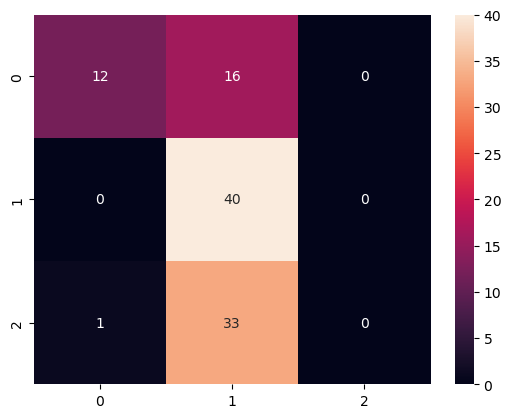

4/4 [==============================] - 0s 3ms/step
Fold 2 - Accuracy: 0.5098039215686274
Confusion matrix:


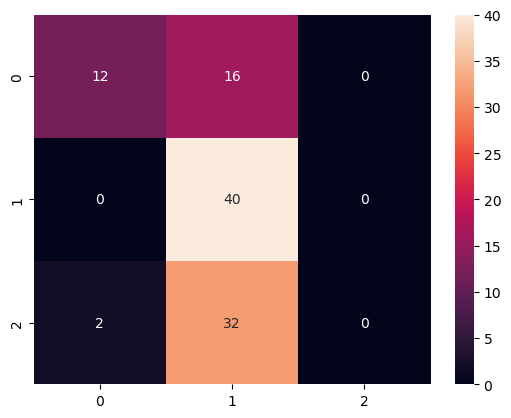

4/4 [==============================] - 0s 3ms/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


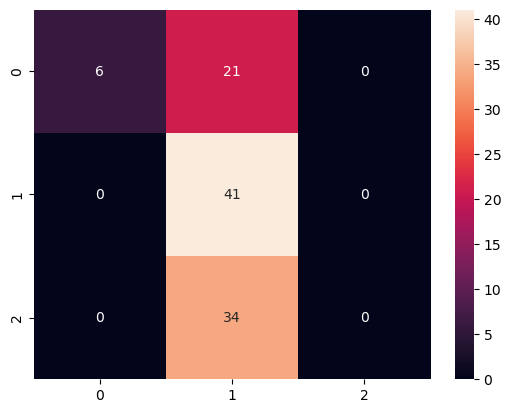

4/4 [==============================] - 0s 3ms/step
Fold 4 - Accuracy: 0.5
Confusion matrix:


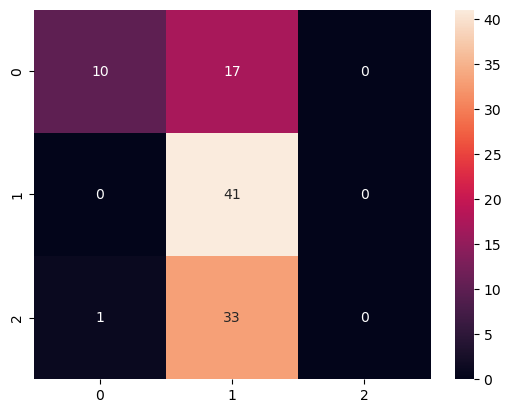

4/4 [==============================] - 0s 4ms/step
Fold 5 - Accuracy: 0.5148514851485149
Confusion matrix:


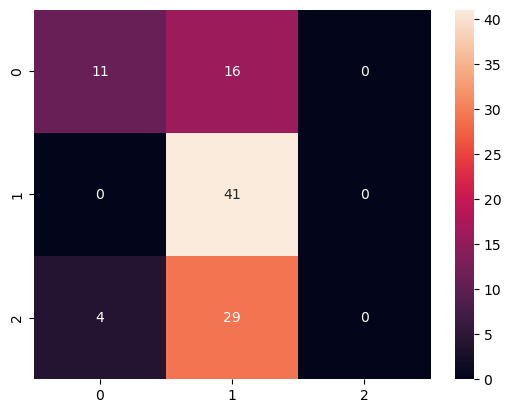

4/4 [==============================] - 0s 2ms/step
Fold 6 - Accuracy: 0.49504950495049505
Confusion matrix:


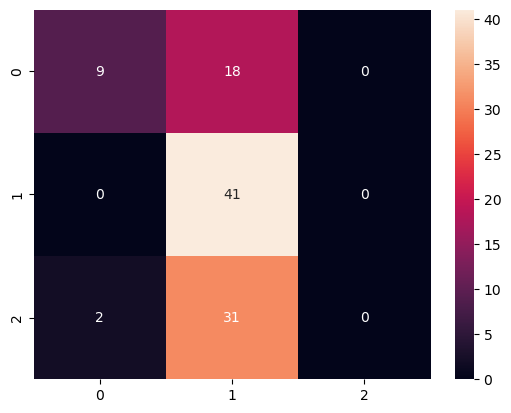

4/4 [==============================] - 0s 3ms/step
Fold 7 - Accuracy: 0.5643564356435643
Confusion matrix:


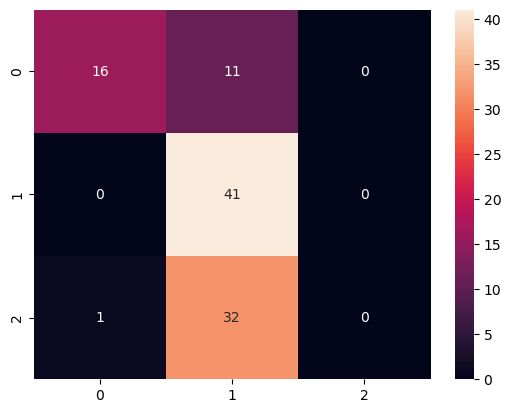

4/4 [==============================] - 0s 3ms/step
Fold 8 - Accuracy: 0.5346534653465347
Confusion matrix:


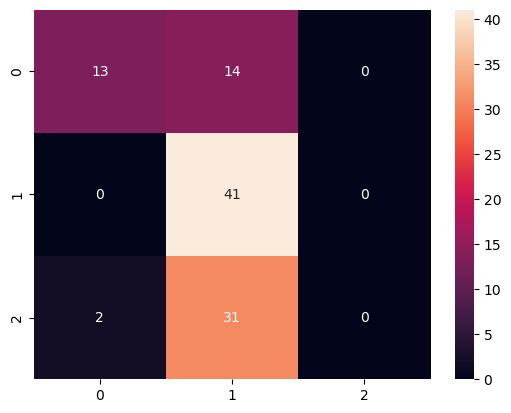

4/4 [==============================] - 0s 3ms/step
Fold 9 - Accuracy: 0.5148514851485149
Confusion matrix:


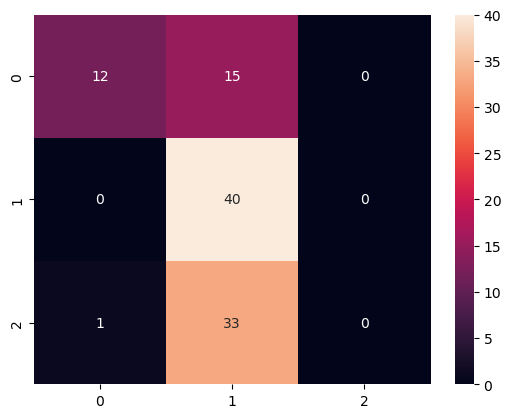

4/4 [==============================] - 0s 2ms/step
Fold 10 - Accuracy: 0.5346534653465347
Confusion matrix:


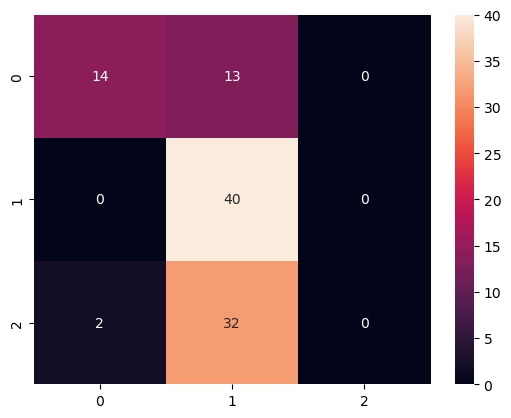

Average Accuracy: 0.5138807998446904


In [1]:
#Neural Network
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


4/4 [==============================] - 0s 3ms/step
Fold 1 - Accuracy: 0.5294117647058824
Confusion matrix:


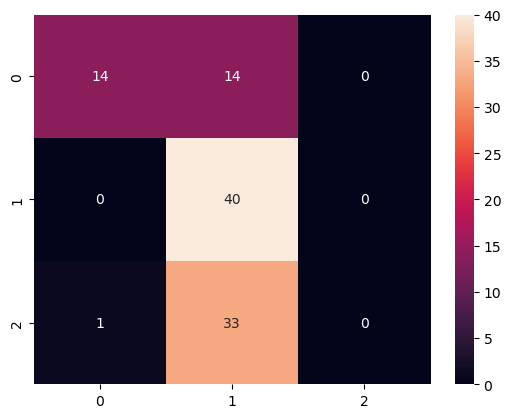

4/4 [==============================] - 0s 3ms/step
Fold 2 - Accuracy: 0.5196078431372549
Confusion matrix:


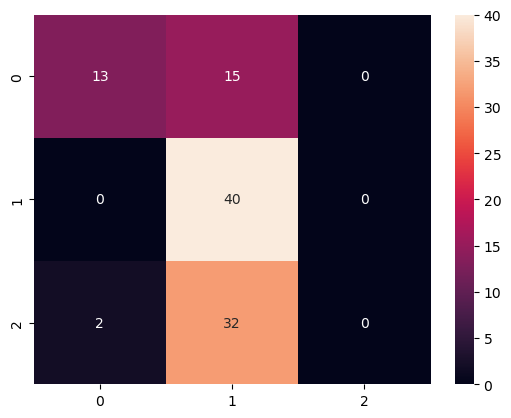

4/4 [==============================] - 0s 3ms/step
Fold 3 - Accuracy: 0.46078431372549017
Confusion matrix:


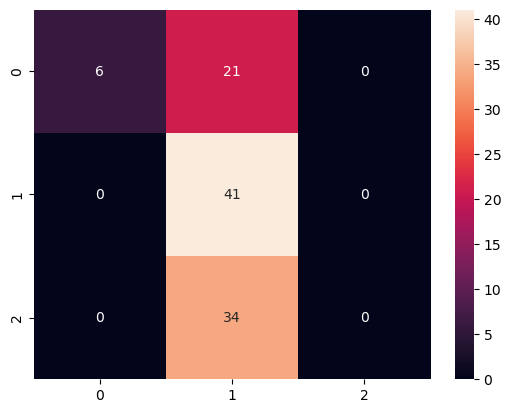

4/4 [==============================] - 0s 3ms/step
Fold 4 - Accuracy: 0.5
Confusion matrix:


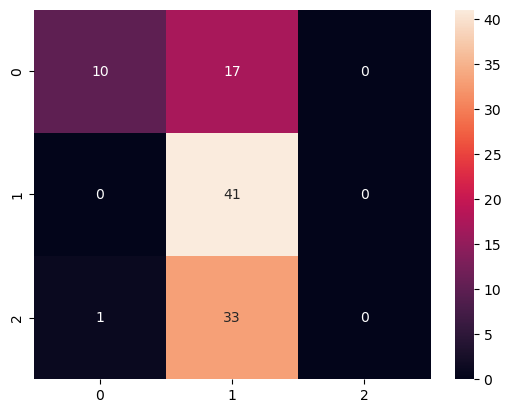

4/4 [==============================] - 0s 3ms/step
Fold 5 - Accuracy: 0.5148514851485149
Confusion matrix:


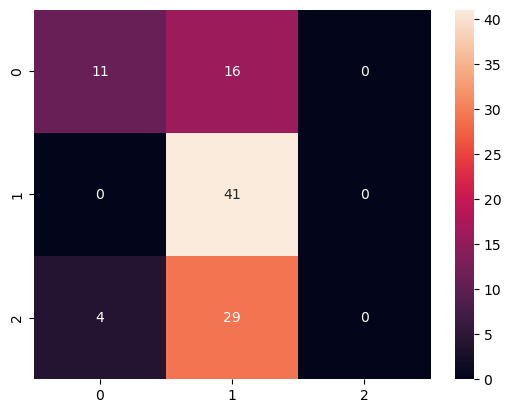

4/4 [==============================] - 0s 2ms/step
Fold 6 - Accuracy: 0.504950495049505
Confusion matrix:


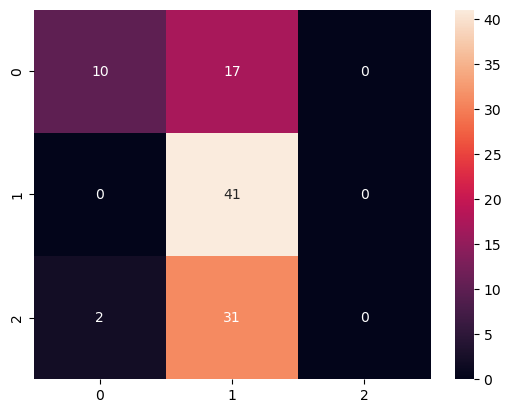

4/4 [==============================] - 0s 3ms/step
Fold 7 - Accuracy: 0.5643564356435643
Confusion matrix:


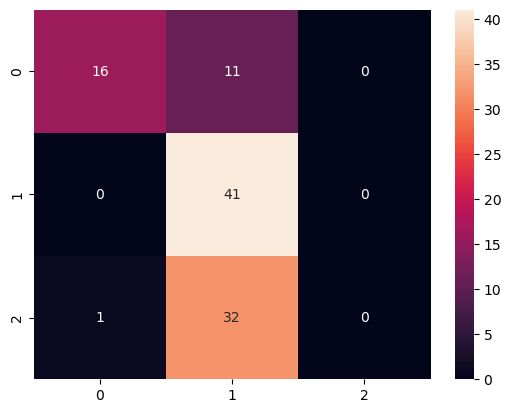

4/4 [==============================] - 0s 2ms/step
Fold 8 - Accuracy: 0.5346534653465347
Confusion matrix:


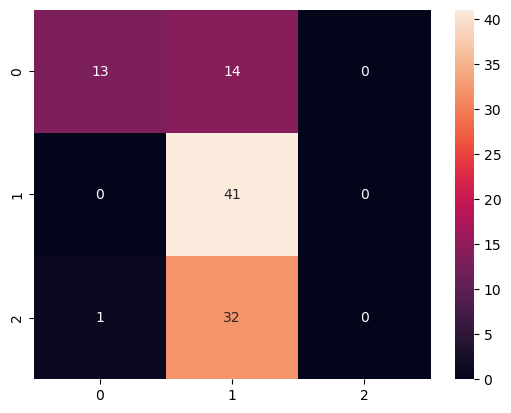

4/4 [==============================] - 0s 2ms/step
Fold 9 - Accuracy: 0.5148514851485149
Confusion matrix:


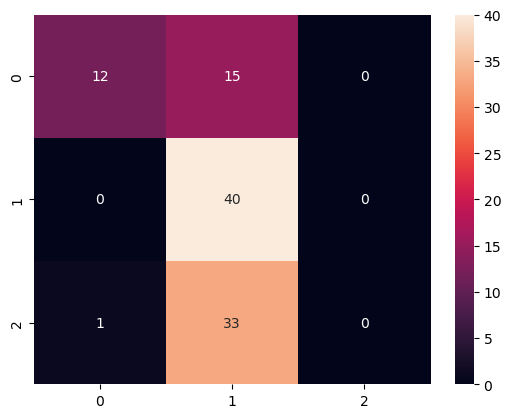

4/4 [==============================] - 0s 2ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


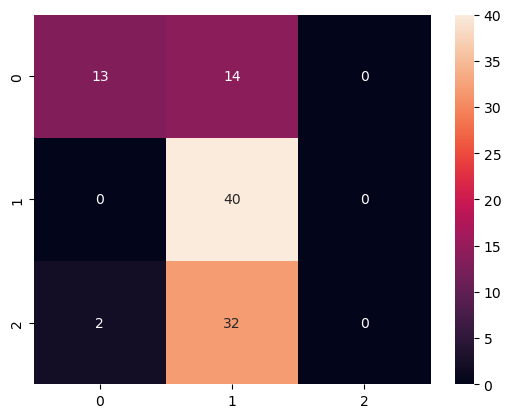

Average Accuracy: 0.5168219763152786


In [2]:
#MLP
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the neural network model
def create_mlp_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Creating and training the MLP model
    mlp_model = create_mlp_model()
    mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = mlp_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


4/4 [==============================] - 0s 3ms/step
Fold 1 - Accuracy: 0.5294117647058824
Confusion matrix:


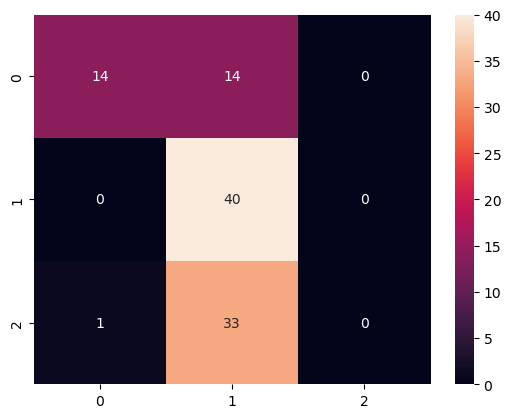

4/4 [==============================] - 0s 3ms/step
Fold 2 - Accuracy: 0.5196078431372549
Confusion matrix:


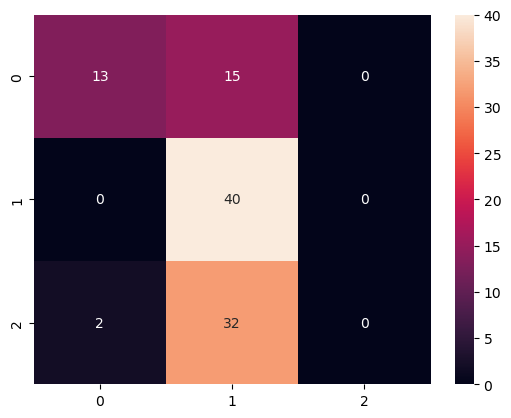

4/4 [==============================] - 0s 2ms/step
Fold 3 - Accuracy: 0.45098039215686275
Confusion matrix:


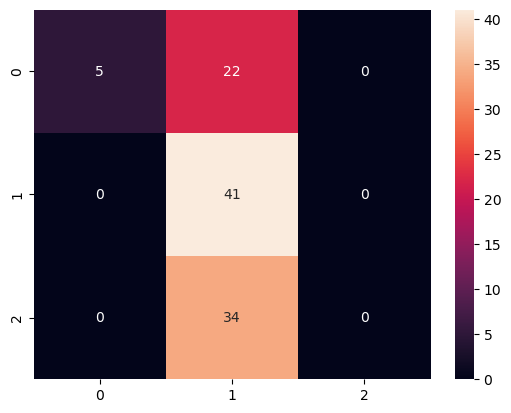

4/4 [==============================] - 0s 3ms/step
Fold 4 - Accuracy: 0.5098039215686274
Confusion matrix:


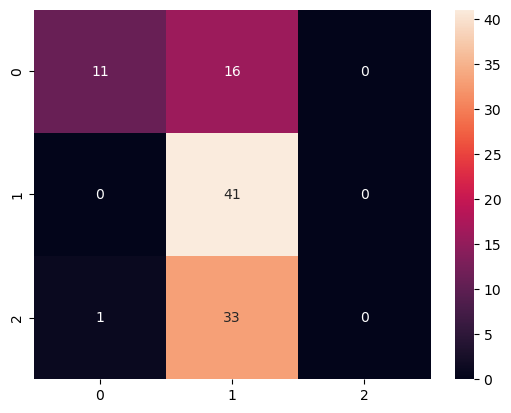

4/4 [==============================] - 0s 2ms/step
Fold 5 - Accuracy: 0.5148514851485149
Confusion matrix:


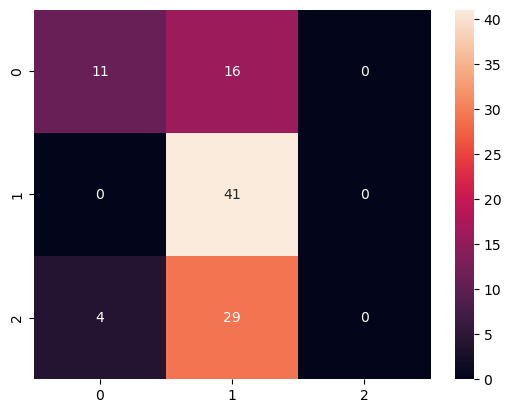

4/4 [==============================] - 0s 2ms/step
Fold 6 - Accuracy: 0.49504950495049505
Confusion matrix:


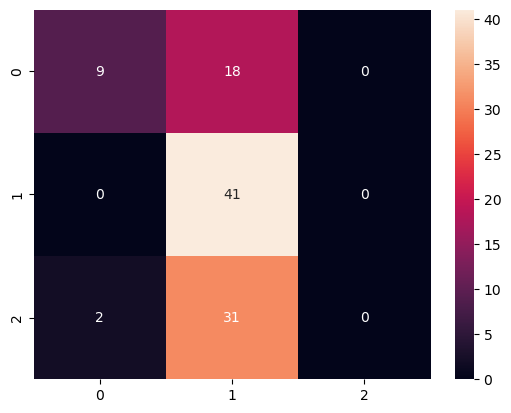

4/4 [==============================] - 0s 2ms/step
Fold 7 - Accuracy: 0.5643564356435643
Confusion matrix:


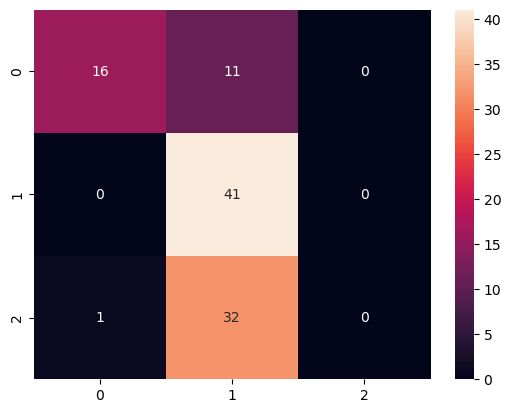

4/4 [==============================] - 0s 3ms/step
Fold 8 - Accuracy: 0.5346534653465347
Confusion matrix:


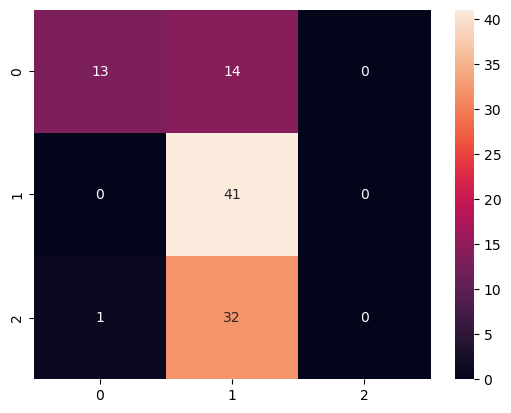

4/4 [==============================] - 0s 1ms/step
Fold 9 - Accuracy: 0.5148514851485149
Confusion matrix:


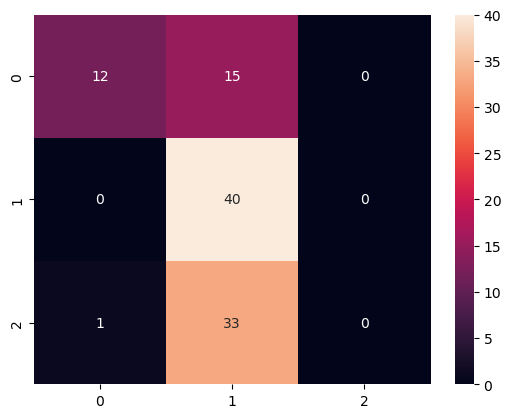

4/4 [==============================] - 0s 3ms/step
Fold 10 - Accuracy: 0.5247524752475248
Confusion matrix:


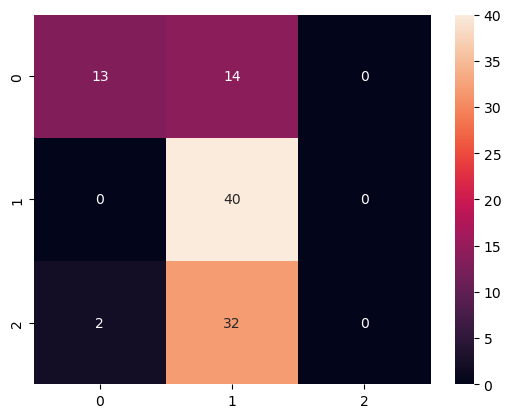

Average Accuracy: 0.5158318773053775


In [3]:
#ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Dataset.csv')
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the neural network model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Creating and training the ANN model
    ann_model = create_ann_model()
    ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    
    y_val_pred_prob = ann_model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)
